In [4]:
# !pip install xlrd

In [5]:
import pandas as pd


In [6]:
def read_ods(year):
    extract = pd.read_excel('../datasets/Income_and_tax/Income_and_tax_{}_{}.ods'.format(year,year+1), sheet_name=1, header=4)
    extract = extract[extract['Region / County codes'].isin(['K02000001', 'E92000001', 'W92000004', 'S92000003', 'N92000002'])]
    extract['Year'] = int("20"+str(year))
    selected_columns = extract[['Region/County', 'Total income: Mean', 'Total tax: Mean', 'Year']]
    selected_columns = selected_columns.rename(columns={
    'Total income: Mean': 'average_income',
    'Total tax: Mean': 'average_tax',
    'Region/County': 'Name',
    'Year': 'Year'
    })
    column_order = ['Name', 'Year', 'average_income', 'average_tax']
    selected_columns = selected_columns[column_order]
    df = pd.DataFrame(selected_columns)
    
    return df

In [7]:
def read_previous_formats(year):
    if year >= 17:
        if year == 18:
            extract = pd.read_excel('../datasets/Income_and_tax/Income_and_tax_{}_{}.ods'.format(year,year+1), sheet_name=1, header=[3,4])
        else:
            extract = pd.read_excel('../datasets/Income_and_tax/Income_and_tax_{}_{}.xlsx'.format(year,year+1), header = [6,9])
        extract.columns = ['_'.join(col).strip() for col in extract.columns.values]
        extract = extract[extract['Region/County_Unnamed: 1_level_1'].isin(['United Kingdom', 'England', 'Wales', 'Scotland', 'Northern Ireland'])]
        average_income = extract['Total income_Mean']
        average_tax = extract['Total tax_Mean']
        
        df = pd.DataFrame({
            'Name': extract['Region/County_Unnamed: 1_level_1'],
            'Year': int("20"+str(year)),
            'average_income': average_income,
            'average_tax': average_tax,
        })
        
    else:
        if year >= 13:
            extract = pd.read_excel('../datasets/Income_and_tax/Income_and_tax_{}_{}.xlsx'.format(year,year+1), header = [6,9])
        else:
            extract = pd.read_excel('../datasets/Income_and_tax/Income_and_tax_{}_{}.xls'.format(year,year+1), header = [6,9])
        extract.columns = ['_'.join(col).strip() for col in extract.columns.values]
        extract = extract[extract['County_Unnamed: 0_level_1'].isin(['United Kingdom', 'England', 'Wales', 'Scotland', 'Northern Ireland'])]
        average_income = extract['Total income_Mean']
        average_tax = extract['Total tax_Mean']
        
        df = pd.DataFrame({
            'Name': extract['County_Unnamed: 0_level_1'],
            'Year': int("20"+str(year)),
            'average_income': average_income,
            'average_tax': average_tax,
        })
    
    return df


In [8]:
read_previous_formats(10)

,Name,Year,average_income,average_tax
3,United Kingdom,2010,27400.0,4850.0
6,England,2010,28000.0,5030.0
85,Wales,2010,22500.0,3230.0
88,Scotland,2010,25200.0,4030.0
91,Northern Ireland,2010,23100.0,3470.0


In [9]:
for year in range(19,22):
    read_ods(year)

In [10]:
def merge_all_years_tax():
    df_list=[]
    for year in range(19,22):
        new_df = read_ods(year)
        df_list.append(new_df)
    for year in range(10,19):
        new_df = read_previous_formats(year)
        df_list.append(new_df)
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

In [11]:
df_raw = merge_all_years_tax()
df = df_raw.sort_values(by='Year')

In [12]:
df

,Name,Year,average_income,average_tax
19,Northern Ireland,2010,23100.0,3470.0
18,Scotland,2010,25200.0,4030.0
17,Wales,2010,22500.0,3230.0
16,England,2010,28000.0,5030.0
15,United Kingdom,2010,27400.0,4850.0
21,England,2011,29400.0,5250.0
24,Northern Ireland,2011,24200.0,3520.0
23,Scotland,2011,27000.0,4260.0
22,Wales,2011,23700.0,3310.0
20,United Kingdom,2011,28800.0,5060.0


In [13]:
import matplotlib.pyplot as plt
import numpy as np

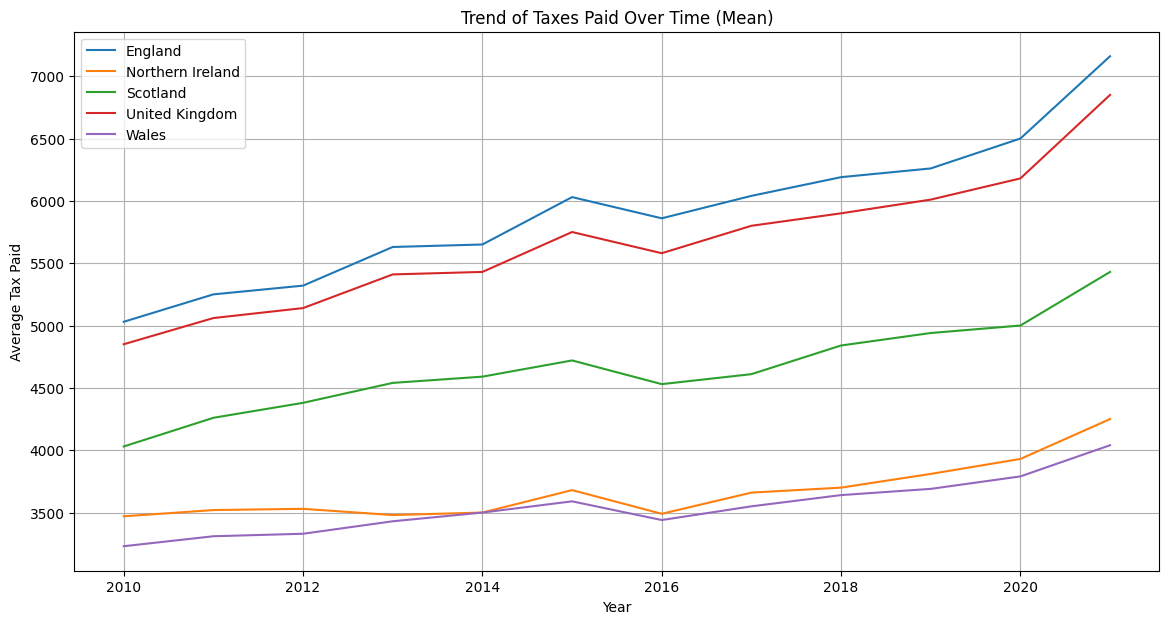

In [18]:
plt.figure(figsize=(14,7))
plt.title('Trend of Taxes Paid Over Time (Mean)')
plt.xlabel('Year')
plt.ylabel('Average Tax Paid')
plt.grid(True)

for name, group in df.groupby('Name'):
    plt.plot(group['Year'], group['average_tax'], label=name)

plt.legend()
plt.show()